In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 33s 2us/step


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 活性化関数：シグモイド

In [21]:
# モデルのコンパイル

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy', # 損失関数：二値の交差エントロピー
             metrics=['accuracy'])

In [22]:
# オプティマイザの設定

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [23]:
# カスタム損失関数とカスタム指標の使用

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=[metrics.binary_accuracy])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [29]:
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
            metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.5046 - acc: 0.7883 - val_loss: 0.3777 - val_acc: 0.8709
Epoch 2/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.2991 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 1s 86us/step - loss: 0.2173 - acc: 0.9282 - val_loss: 0.3076 - val_acc: 0.8723
Epoch 4/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1747 - acc: 0.9439 - val_loss: 0.2825 - val_acc: 0.8843
Epoch 5/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1420 - acc: 0.9543 - val_loss: 0.2858 - val_acc: 0.8855
Epoch 6/20
15000/15000 [==============================] - 1s 85us/step - loss: 0.1147 - acc: 0.9651 - val_loss: 0.3123 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 1s 82us/step - loss: 0.0977 - acc: 0.9709 - val_loss: 0.3132 - val_ac

In [30]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

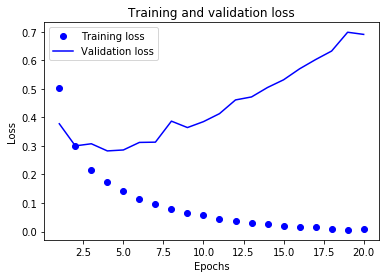

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

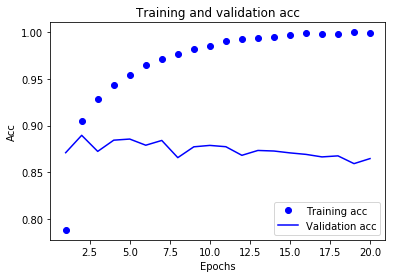

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.4750 - acc: 0.8215
Epoch 2/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2664 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1984 - acc: 0.9292
Epoch 4/4
25000/25000 [==============================] - 2s 62us/step


In [37]:
results

[0.32534594853401183, 0.8728]